# **Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Big_Mart_train.csv')


In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Find Shape of our Dataset (Number of Rows And Number of Columns)**

In [5]:
data.shape

(8523, 12)

# **Getting information about dataset like total number of rows, Total number of columns, Datatype of each columns And Memory Requirements.**

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Check null values in dataset**

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **Total percentage of null values**

In [8]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


# **Dealing with Duplicates values**

In [9]:
data.duplicated().any()

np.False_

# **Dealing with Missing Value**

In [10]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

# **Univariate Imputation**

In [12]:
mean_weight = data['Item_Weight'].mean()
meadian_weight = data['Item_Weight'].median()

In [13]:
print(mean_weight)
print(meadian_weight)

12.857645184135976
12.6


In [14]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(meadian_weight)
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


After applying mean and median to a dataset variance tends to decrese

In [15]:
print("Original weight variable variance",data['Item_Weight'].var())
print("Item weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item weight variance after median imputation",data['Item_Weight_median'].var())

Original weight variable variance 21.561688259836558
Item weight variance after mean imputation 17.86012173506058
Item weight variance after median imputation 17.869561454073647


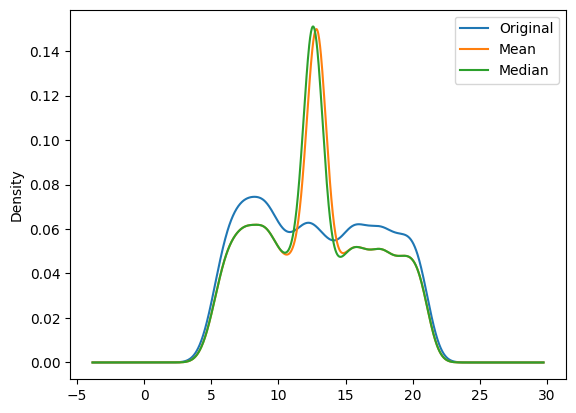

In [16]:
data['Item_Weight'].plot(kind = "kde",label="Original")
data['Item_Weight_mean'].plot(kind = "kde",label="Mean")
data['Item_Weight_median'].plot(kind = "kde",label="Median")

plt.legend()
plt.show()

After applying mean and median impution data distribution has been altered, most value are cluster around mean and median which are not desirable

# **their box plot**

<Axes: >

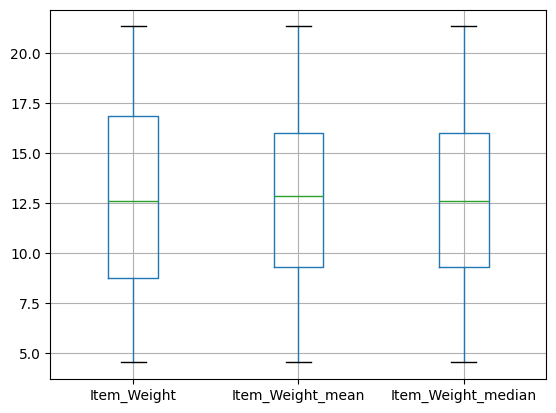

In [17]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

we observed reduction in the spread of data after filling the missing value with mean and median which is not desirable

# **Now filling the missing value of item weight with interpolate method**

In [18]:
data['Item_Weight_interpolate'] = data['Item_Weight'].interpolate(method = 'linear')

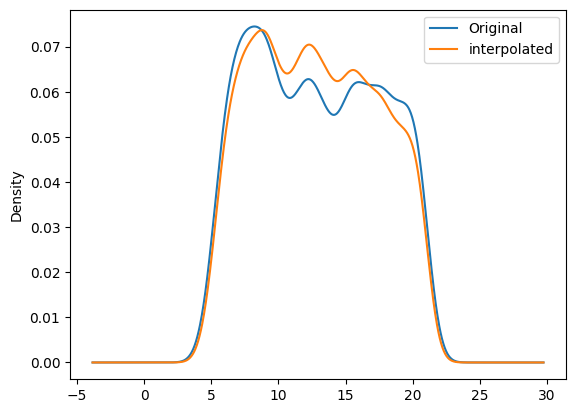

In [19]:
data['Item_Weight'].plot(kind = "kde",label="Original")
data['Item_Weight_interpolate'].plot(kind = "kde",label="interpolated")

plt.legend()
plt.show()

this method is better as compaired to previous methods

# **Multivariate Imputation**

K Nearest Neibour Imputer - works by identifying the k nearest data point for a missing entry and then compute an average of those values to fill the missing entry based on the principle that the similar data points often have the similar values

In [20]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10,weights="distance")
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

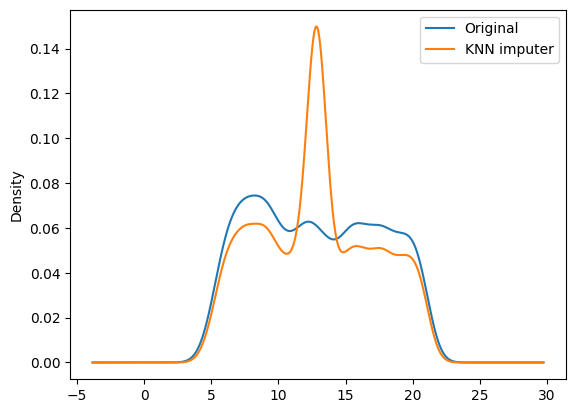

In [21]:
data['Item_Weight'].plot(kind = "kde",label="Original")
data['knn_imputer'].plot(kind = "kde",label="KNN imputer")

plt.legend()
plt.show()

From this all method we can say linear interpolation is the prefered method to fill the missing values in item_weight


In [22]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis = 1)

In [23]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [24]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

# **Outlet_size**



In [25]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [26]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

# **calculating mode for Outlet_size as per outlet_type**

In [27]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

Missing value of outlet_size filled on the basis of mode_size

In [29]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [30]:
data.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
5,FDP36,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395
6,FDO10,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,13.650
7,FDP10,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,14.925
8,FDH17,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,16.200
9,FDU28,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,19.200


# **checking the missing value**

In [31]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

# **Item_Fat_Content**

In [32]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [33]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

# **Handling the Duplicates Values**

In [34]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace = True)

In [35]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# **Item_Visibility**

In [36]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [37]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.107274      2
0.074613      2
0.045166      2
           ... 
0.056783      1
0.046982      1
0.035186      1
0.145221      1
0.016827      1
Name: count, Length: 7880, dtype: int64

There are 526 0's means null values in Item_Visibility column so, we have to deal with it

In [38]:
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method = 'linear')

In [39]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [40]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.080969    2
0.096592    2
0.093308    2
0.076792    2
           ..
0.043792    1
0.040399    1
0.037006    1
0.091473    1
0.016047    1
Name: count, Length: 8405, dtype: int64

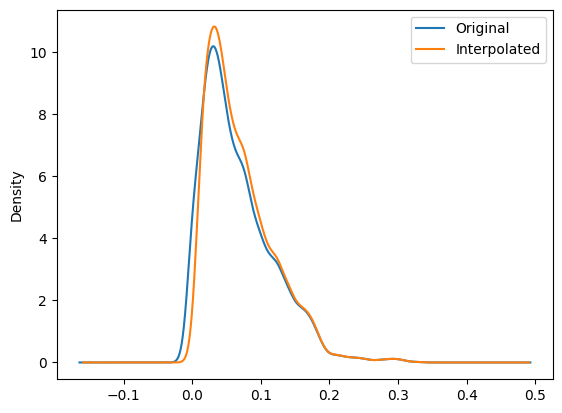

In [41]:
data['Item_Visibility'].plot(kind="kde",label="Original")
data['Item_Visibility_interpolate'].plot(kind="kde",label="Interpolated")

plt.legend()
plt.show()

here distribution are very close to each other so, we succesfully handle the 0's

now we can drop the original column Item_Visibility

In [42]:
data = data.drop(['Item_Visibility'],axis = 1)

In [43]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


# **Item_Type**

In [44]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [45]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

# **Item_Identifier**

In [46]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [47]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [48]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64

There are 3 type of item there Food, Drinks and Non Consumables, We can Simply categorise with 3 item

In [49]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

# **Outlet_Establishment_Year**

In [50]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [51]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

# **Converting the Establishment year to the age of the item**

In [52]:
import datetime as dt
current_year = dt.datetime.today().year
current_year


2025

In [53]:
data['Outlet_age']=current_year - data['Outlet_Establishment_Year']

In [54]:
data['Outlet_age']

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_age, Length: 8523, dtype: int64

In [55]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,26
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,16
2,FD,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,26
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,27
4,NC,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,38


In [56]:
data = data.drop('Outlet_Establishment_Year', axis=1)

In [57]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,26
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,16
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,26
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,27
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,38


# **Handling Categorical Columns (Ordinal encoding)**

In [58]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_col = data.select_dtypes(include=['object']).columns

for col in cat_col:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [59]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,38


# **Splitting the data into dependent and independent variables**

In [60]:
x = data_encoded.drop('Item_Outlet_Sales',axis = 1)
y = data_encoded['Item_Outlet_Sales']

In [61]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# **Random Forest Regressor**

In [62]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


# **XGBRF Regressor(Extream greadient boosting Random Forest regressor)**

In [63]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


From this we can say that XGBRFRegressor is best model for this dataset

# **XGBRFRegressor Feature Importance**

In [64]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(x,y)
pd.DataFrame({
    'feature':x.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)


,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_Weight_interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


List of column that we have to drop

In [65]:
['Item_Type','Item_Fat_Content','Item_Identifier','Item_Visibility_interpolate','Outlet_Location_Type','Item_Weight_interpolate']

['Item_Type',
 'Item_Fat_Content',
 'Item_Identifier',
 'Item_Visibility_interpolate',
 'Outlet_Location_Type',
 'Item_Weight_interpolate']

In [66]:
from xgboost import XGBRFRegressor


In [67]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,x.drop(
    ['Item_Type','Item_Fat_Content','Item_Identifier','Item_Visibility_interpolate','Outlet_Location_Type','Item_Weight_interpolate']
    ,axis = 1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


we get the r^2 score and improvement in r^2 score after droping these column

In [68]:
Final_data = x.drop(columns=['Item_Type','Item_Fat_Content','Item_Identifier','Item_Visibility_interpolate','Outlet_Location_Type','Item_Weight_interpolate'])

In [69]:
Final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,38
8519,108.1570,7.0,2.0,1.0,23
8520,85.1224,6.0,2.0,1.0,21
8521,103.1332,3.0,1.0,2.0,16


# **Best Model**

Training our best model in this final dataset

In [70]:
from xgboost import XGBRFRegressor

In [71]:
xg_final = XGBRFRegressor()

In [72]:
xg_final.fit(Final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [74]:
x_train,x_test,y_train,y_test = train_test_split(Final_data,y,test_size = 0.20,random_state = 42)

In [75]:
xg_final.fit(x_train,y_train)
y_pred = xg_final.predict(x_test)

In [76]:
mean_absolute_error(y_test,y_pred)

np.float64(713.9516489619299)

# Prediction on Unseen data

In [77]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
print(pred)

[2067.0864]


In [78]:
print(f"Sales Value is between {pred-714.60} and {pred+714.60}")

Sales Value is between [1352.4865] and [2781.6865]


# **Saving the model using joblib**

In [79]:
import joblib

In [80]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [81]:
model = joblib.load('bigmart_model')

In [82]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
print(pred)

[2067.0864]


In [83]:
print(f"Sales Value is between {pred-714.60} and {pred+714.60}")

Sales Value is between [1352.4865] and [2781.6865]
